# Halo structural parameters definitions and conversions

This notebook goes trough different conversion of structural halo parameters. We will mainly focus on the NFW and Hernquist halos, but can easily be generalized to other halos. 

In [14]:
%pylab inline
import nba
from astropy import units as u
plt.style.use('~/Work/research/MW_viz/matplotlib.mplstyle')
import gala.potential as gp
from gala.units import galactic

Populating the interactive namespace from numpy and matplotlib


Let's first define the main structural quantities and define the notation used here. 
several quantities are defined with respect to the averange density of the Univese. The average matter density of the Universe $\bar{\rho} = \rho_{crit} \Omega_m$, where $\rho_{crit}$ is the critical density of the Universe and $\Omega_m$ is the dark matter density of the universe.

\begin{equation}
\rho_{crit} = \frac{3H_0^2}{8\pi G}
\end{equation}

## Virial quantities 

Virial quantities are defined as the region that encloses:

\begin{equation}
\bar{\rho}_{vir} = \Delta_{vir} \Omega_m \rho_{crit}
\end{equation}

Where the virial density can be computed from the top-hat model $\Delta_{vir} \approx 18 \pi^2 + 82 x - 39 x^2$; $x = \Omega_m (Z) - 1$  within a spherical region that is $\Delta_{vir}$ times denser that the average matter density of the Universe; $\bar{\rho} = \rho_{crit} \Omega_m$, where $\rho_{crit}$ is the critical density of the Universe and $\Omega_m$ is the dark matter density of the universe.

## 200 quantities 

Similarly, structural quantities are defined as a region that encloses 200 times the critical density of the universe: 

\begin{equation}
\bar{\rho}_{200} = 200 \rho_{crit}
\end{equation}


|Quantity | Definitation | reference|  
|----| ------ | -----| 
| $M_{vir}$      |  |  
| $M_{200c}$ |  |
| $R_{vir}$  | |
| $R_{200c}$ | |

We can now take a look at how these quantities evolved as a function of redshift. 
In the plots below we can see the redshift evolution of $\Omega_m$, $\Delta_{vir}$, and the prduct of both quantites.


In [2]:
cosmo = nba.cosmology.Cosmology()

In [3]:
z = np.linspace(0, 10, 1000)
Omega_mz = cosmo.Omega_z(z)
Delta_vir = cosmo.Dvir(z)

Text(0.5, 0, '$z$')

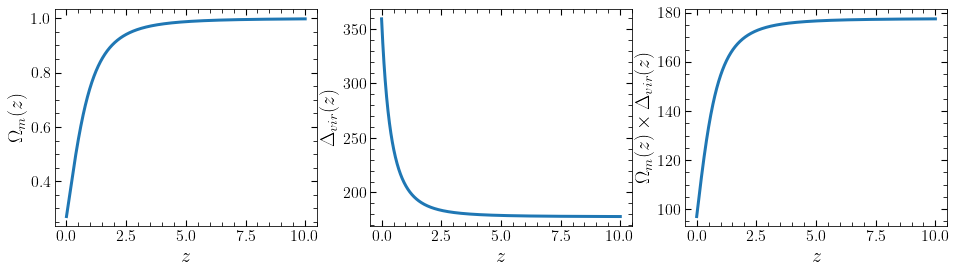

In [4]:

fig, ax = plt.subplots(1, 3, figsize=(16, 4))
ax[0].plot(z, Omega_mz)
ax[1].plot(z, Delta_vir)
ax[2].plot(z, Delta_vir*Omega_mz)
ax[0].set_ylabel('$\Omega_m(z)$')
ax[1].set_ylabel('$\Delta_{vir}(z)$')
ax[2].set_ylabel(r'$\Omega_m(z) \times \Delta_{vir}(z)$')
ax[0].set_xlabel('$z$')
ax[1].set_xlabel('$z$')
ax[2].set_xlabel('$z$')


Of course these structural quantities would depend on the density profile of the halo. 
For the NFW halo:

\begin{equation}
\rho_{\rm{NFW}}(r) = \dfrac{\rho_s}{r/r_s (1+r/r_s)^2}
\end{equation}

While for the a Hernquist halo we have: 

\begin{equation}
\rho_{\rm{Hern}}(r) = \dfrac{\rho_s}{r/r_s (1+r/r_s)^3}
\end{equation}

Where $\rho_s$ and $r_s$ are free parameters. Similary the total mass of these halos are: 


\begin{equation}
M_{\rm{NFW}}(r) = 4 \pi a^3 \rho_s \left( {\rm{ln}}(1+r/r_s) -  \dfrac{r/r_s}{2 (1+r/r_s)} \right)
\end{equation}


\begin{equation}
M_{\rm{NFW}}(r) = 4 \pi a^3 \rho_s f(x)
\end{equation}

Where $f(x) =  {\rm{ln}}(1+x) -  \dfrac{x}{(1+x)}$ and  $x=r/r_s$



\begin{equation}
M_{\rm{Hern}}(r) = M_{H} \dfrac{(r/r_s)^2}{(1+r/r_s)^2}
\end{equation}

For the Hernquist profile, the total mass converges to M_{H} when $r->\infty$, while for the NFW profile, 
the mass goes to $\infty$ as $ln (1+r/r_s)$. Thus, for the NFW profile once needs to define a Mass at a given radius.  
It is convenient to define these quantities with respect to a "standard" quantity. The common 
choice are either the virial and 200 radius.  


| Quantity | Definition |
| ----- | ----- |
| $M_{\rm{Hern}}$     | Total mass of the Hernquist model |
| $M_{\rm{NFW}}$      | Total mass of the NFW model |
| $r_s$       | Scale length of the NFW halo |
| $a$         | Scale length of the Hernquist halo |
| $c_x$       | Concentration at radius x |


Let's define a halo with the following virial quantities: 

In [5]:

Mvir = 1e12 * u.Msun
cvir = 10
rvir = cosmo.rvir(Mvir, z=0)
print(rvir)
rs = rvir / cvir
print(rs)

261.46813948044354 kpc solMass(1/3)
26.146813948044354 kpc solMass(1/3)


In [10]:
# 
M200, c200 = cosmo.NFW_200(Mvir, cvir, z=0)

In [35]:
r200 = c200 * rs

In [39]:
print(M200, c200, r200)

838386582687.5615 solMass 7.408721676838023 193.71446727712697 kpc solMass(1/3)


In [40]:
print(rvir/cvir, r200/c200)

26.146813948044354 kpc solMass(1/3) 26.146813948044354 kpc solMass(1/3)


The correspondeing NFW mass is related to $M_{vir}$ and $M_{200}$: 
    
$M_{NFW} = M_{vir} / f(c_vir) = M_{200} / f(c_{200})$

In [45]:
def NFW_Mscale(mass_x, c_x):
    """
    Function to compute the scale mass of an NFW halo
    
    Parameters:
    
    mass_x : scalar:
        Enclosed mass at radius x
    c_x : scalar
        Concentrarion at radius x
    
    Wehre x could be any distance for example r200 or rvir
    
    """
    fx = np.log(1.0 + c_x) - (c_x / (1.0 + c_x))
    return mass_x / fx


In [48]:
MNFW = NFW_Mscale(Mvir, cvir)
print(MNFW/1e12)

0.6716799227467151 solMass


In [49]:
NFW_halo = gp.NFWPotential(MNFW, r_s=26.14*u.kpc, units=galactic)

In [50]:
xyz = np.zeros((100, 3))
xyz[:,0] = np.linspace(0.01, 300, 100)

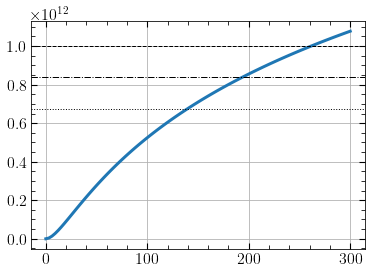

In [55]:
plt.plot(xyz[:,0], NFW_halo.mass_enclosed(xyz.T))
plt.grid()
plt.axhline(MNFW.value, c='k', lw=1, ls=':')
plt.axhline(M200.value, c='k', lw=1, ls='-.')
plt.axhline(Mvir.value, c='k', lw=1, ls='--')

For the Hernquist halo we have:

In [75]:
# 
def Mhern(Mx, Rx, Rs):
    fx =  (Rx/Rs)**2 / (1+(Rx/Rs))**2
    Mh = Mx*fx
    return Mh

In [76]:
Mh = Mhern(Mvir, rvir, rs)
print(Mh)

826446280991.7356 solMass


In [77]:
Mh = Mhern(M200, r200, rs)
print(Mh)

650835035372.2233 solMass


In [66]:
Hern_halo = gp.HernquistPotential(Mh, rs.value*u.kpc, units=galactic)

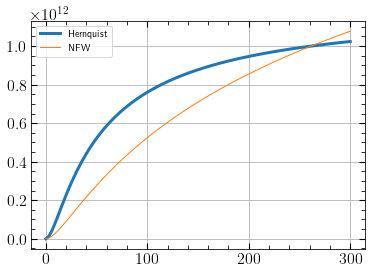

In [69]:
plt.plot(xyz[:,0], Hern_halo.mass_enclosed(xyz.T), label='Hernquist')
plt.plot(xyz[:,0], NFW_halo.mass_enclosed(xyz.T), lw=1, label='NFW')
plt.legend()
plt.grid()


In [9]:
NFW_Mscale(Mvir, cvir) 

<Quantity 6.71679923e+11 solMass>

In [11]:
NFW_Mscale(M200, c200) 

<Quantity 6.71679923e+11 solMass>

In [ ]:
Mnfw_halo_S21 = 7.92e11
c_halo_S21 = 15.3
r_s_halo_S21 = 12.8 * u.kpc

In [5]:
Mvir, rvir = nba.cosmology.NFW_virial(1E12, 260/15)

In [7]:
NFW_Mscale(1e12, 260/15) /1e12

0.5093552382409597

In [2]:
nba.cosmology.NFW_virial?

In [9]:
NFW_Mscale(7.92e11, 15.3)/1E12

0.4275269485269452

In [3]:
MHern_GC23 = 1.57e12 